In [ ]:
import pandas as pd
import numpy as np 
import re
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

2.12.0


In [ ]:
!pip install indic-nlp-library



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 KB 11.6 MB/s eta 0:00:00


In [ ]:
from indicnlp.tokenize import indic_tokenize 


In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/hindi_english_parallel.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hindi_english_parallel.csv')

In [ ]:
df.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default


In [ ]:
df = df.dropna()
df.reset_index()

,index,hindi,english
0,0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default
...,...,...,...
1555722,1561835,Members making oath/affirmation,शपथ लेने/प्रतिज्ञान करने वाले सदस्य
1555723,1561836,स्पष्टीकरण.–जहां इस उपधारा के अधीन हानि और लाभ...,स्पष्टीकरण.–जहां इस उपधारा के अधीन हानि और लाभ...
1555724,1561837,मैंने गौर किया है कि यह न केवल अपने महत्त्वपूर...,है। I note that this is a landmark meeting – n...
1555725,1561838,उन्होंने मेरे समक्ष जो प्रदर्शन किया उसमें से ...,है। In the presentations that they made before...


In [ ]:
def pre_processing(sentence):
  pattern = r"\s*\(\_\s*[a-zA-Z]\)"
  sentence = re.sub(pattern, "", sentence)
  pattern = r"\s*\([a-zA-Z]\s_\)"
  sentence = re.sub(pattern, "", sentence)
  sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  #remove % [a-z]
  #sentence = re.sub(r'%\s*[a-z]', '', sentence)
  if re.search(r'[a-z]_[a-z]', sentence):
      sentence = re.sub(r'_', "", sentence)
  if re.search(r'[a-z]_[A-Z]', sentence):
      sentence = re.sub(r'_', " ", sentence)
  if re.search(r'[a-zA-Z]\s_\s[a-z]', sentence):
      sentence = re.sub(r'\s_\s', "", sentence)
  if re.search(r'[a-z]\s_\s[A-Z]', sentence):
      sentence = re.sub(r'\s_\s', " ", sentence)

  #remove % s 
  sentence = re.sub(r"%\ss\s", "", sentence)
  sentence = re.sub(r"\ss\s", "", sentence)
  sentence = re.sub(r"\sd\s", "", sentence)
  
  sentence = re.sub(r"^Y\s= ", "", sentence)

  # replacing everything with space except (".", "?", "!", ",","¿",":","%","|","(",")","-","<",">","।(hindi full stop)","॰")
  sentence = re.sub(r"[=?.!₹+,;¿/:|%()<>।॰{}#_'\"]", " ", sentence)
  sentence = re.sub(r"…", " ", sentence)
  #remove double quotes
  sentence = re.sub(r'"', " ", sentence)
  #remove english letters
  #sentence = re.sub(r'[a-zA-z]', " ", sentence)
  #remove numbers
  sentence = re.sub(r'[0-9]', "", sentence)
  sentence = re.sub(r'#([^s]+)', r'1', sentence)
  #remove website links
  sentence = re.sub('((www.[^s]+)|(https?://[^s]+))','',sentence)
  #remove @anythin here
  sentence = re.sub('@[^s]+','',sentence)
  #remove multiple spaces
  sentence = re.sub(r'[" "]+', " ", sentence)
  # remove extra space
  sentence = sentence.strip()
  sentence = '<start> ' + sentence + ' <stop>'
  return sentence



In [ ]:
df['hindi'] = df['hindi'].apply(lambda x: pre_processing(x))
df['english'] = df['english'].apply(lambda x: pre_processing(x))

df.dropna()
df = df.drop(df[df['english'].str.contains("ToDo")].index)

#drop rows with hindi words in english colmn 
hindi_pattern = re.compile(r'[\u0900-\u097F]+')
mask = df['english'].apply(lambda x: bool(hindi_pattern.search(x)))
df = df[~mask]

#drop rows where lenght of characters is less than 4
mask = df['english'].str.len() < 4
df = df[~mask]



In [ ]:
df.reset_index()

NameError: ignored

In [ ]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens


In [ ]:
#df['hindi_tokenized'] = df['hindi'].apply(lambda x: tokenization(x))


In [ ]:
df.tail(10000)

,hindi,english
1551833,राष्ट्रपति ने कहा कि प्रौद्योगिकीविद समस्या सम...,The President saidtechnologists are problem so...
1551834,राष्ट्रपति ने कहा कि गुणवत्तायुक्त चिकित्सा उप...,The President said technology has to be harnes...
1551835,राष्ट्रपति ने कहा कि प्रौद्योगिकी उन्नति की कु...,The President said technology is the key to ad...
1551836,राष्ट्रपति ने कहा कि आतंकवाद और हिंसा का दुनिय...,The President said terror and violence have no...
1551837,राष्ट्रपति ने कहा कि आतंकवाद एक प्रमुख चुनौती ...,The President said terrorism remains a major c...
...,...,...
1561828,जोनलः रू 0 50 लाख के प्रत्येक वार्षिक पुरस्कार...,Zonal Eleven annual awards of ₹ 0 50 lakh each...
1561829,इस्लाम से पहले करोड़ों लोगों के इस पारसी धर्म ...,Zoroastrianism which was once the religion of ...
1561830,य प्रतिभूतिकरण से किसी प्रतिभूतिकरण कंपनी या प...,z securitisation means acquisition of financia...
1561831,राष्ट्रपति जी ने कहा कि जुबिन मेहता संगीत को श...,ZUBIN MEHTA HAS ENGAGED IN UNTIRING EFFORTS TO...


In [ ]:
#save df to csv
#df.to_csv('/content/drive/MyDrive/hindi_english_parallel_preprocessed.csv' , index = False )
df = pd.read_csv('/content/drive/MyDrive/hindi_english_parallel_preprocessed.csv')

In [ ]:
#drop rows where lenght of characters is less than 4
mask = df['english'].str.len() > 182
df = df[~mask]

In [ ]:
df.reset_index()

,index,hindi,english
0,0,<start> किसी मिश्रण में प्रोटीनों साबुन या अन्...,<start> Salting out is done by adding salt to ...
1,1,<start> अभियोगकर्ता <stop>,<start> plaintiff <stop>
2,2,<start> गामा काला <stop>,<start> Gamma Black <stop>
3,3,<start> काई-अनुक्रम का विशिष्ट डीएनए अनुक्रम <...,<start> Specific DNA sequence of chi - sequenc...
4,4,<start> विश्व के विभिन्न भागों में तट पर स्थित...,<start> Large - scale Off - shore Thermal Ener...
...,...,...,...
1399782,1553134,<start> इस संदेश को फिर कभी नहीं दिखाएँ <stop>,<start> Do not show this message again <stop>
1399783,1553135,<start> कह दो हाँ और तुम अपमानित भी होंगे <stop>,<start> Proclaim “Yes and with disgrace ” <stop>
1399784,1553137,<start> शुक्र <stop>,<start> Fr <stop>
1399785,1553138,<start> और खिड़कियों को खुला रखा <stop>,<start> and pry open the windows <stop>


In [ ]:
# Tokenize the sentence into list of words(integers) and pad the sequence to the same length
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')
  return tensor, lang_tokenizer

In [ ]:
input_tensor, inp_lang_tokenizer = tokenize(df.iloc[:100 , :]['hindi'])
print(input_tensor.shape)
print(inp_lang_tokenizer.word_index)

(100, 39)
{'<start>': 1, '<stop>': 2, 'के': 3, 'में': 4, 'है': 5, 'की': 6, 'और': 7, 'का': 8, 'को': 9, 'पर': 10, 'लिए': 11, 'से': 12, 'किया': 13, 'हो': 14, 'हैं': 15, 'जाने': 16, 'तो': 17, 'कि': 18, 'या': 19, 'जो': 20, 'किसी': 21, 'करने': 22, 'रूप': 23, 'ही': 24, 'ने': 25, 'न': 26, 'उस': 27, 'हम': 28, 'एक': 29, 'कर': 30, 'तथा': 31, 'योजना': 32, 'आप': 33, 'यदि': 34, 'यह': 35, 'नहीं': 36, 'इस': 37, 'उपयोग': 38, 'भी': 39, 'तरह': 40, 'वह': 41, 'उसे': 42, 'अपने': 43, 'दिन': 44, 'अन्य': 45, 'जाता': 46, 'ऊर्जा': 47, 'दे': 48, 'विकास': 49, 'अल्लाह': 50, 'रहे': 51, 'आता': 52, 'दिया': 53, 'गया': 54, 'जा': 55, 'सके': 56, 's': 57, 'कोई': 58, 'लोगों': 59, 'करें': 60, 'वे': 61, 'सामान्य': 62, 'जैव': 63, 'विश्व': 64, 'बन': 65, 'किए': 66, 'वाले': 67, 'वाली': 68, 'आने': 69, 'अपनी': 70, 'सूचना': 71, 'तुमसे': 72, 'झुठला': 73, 'रसूल': 74, 'पहुँचा': 75, 'सिंचाई': 76, 'पक्ष': 77, 'ये': 78, 'जिन्हें': 79, 'करना': 80, 'ऐसा': 81, 'श्रेणी': 82, 'उन्होंने': 83, 'भारत': 84, 'संस्थानों': 85, 'बना': 86, 'जाए': 87, '

In [ ]:
def create_dataset(path, num_examples):
  lines = io.open(path).read().strip().split('\n')
  word_pairs = [[pre_processing(w) for w in l.split('\t')]  for l in lines[:num_examples]]
  return zip(*word_pairs)

In [ ]:
def load_dataset(data):
  # creating cleaned input, output pairs
  

  input_tensor, inp_lang_tokenizer = tokenize(data['hindi'])
  target_tensor, targ_lang_tokenizer = tokenize(data['english'])

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer = load_dataset(df.iloc[:50000,:]  )
#load_dataset(df.iloc[:900000,:]  ) used 8/12.7gb

In [ ]:
input_tensor.shape

(50000, 120)

In [ ]:
df.shape

(1399787, 2)

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2 , random_state=42)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))
print(input_tensor_train[0])
print(target_tensor_train[0])

40000 40000 10000 10000
[    1   222    10   485   895 11770     5   805   215     5  1433  4049
     7   807    54     4     2     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[   1  805  181   14 2556   41 5839    7  297  133    4 3402   11 2349
    8    3  805  424    2    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


Model after this

In [ ]:
# Configuration 
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
steps_per_epoch_val = len(input_tensor_val)//BATCH_SIZE
embedding_dim = 256  # for word embedding
units = 1024  # dimensionality of the output space of RNN
vocab_inp_size = len(inp_lang_tokenizer.word_index)+1
vocab_tar_size = len(targ_lang_tokenizer.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
validation_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val)).shuffle(BUFFER_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE, drop_remainder=True)

example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape


(TensorShape([64, 120]), TensorShape([64, 40]))

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,  # Whether to return the last output in the output sequence, or the full sequence. 
                                   return_state=True,  # Whether to return the last state in addition to the output.
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 120, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)


  def call(self, x, hidden):
    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x, initial_state = hidden)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)
    return x, state

In [ ]:
tf.reshape([[1,2,3],[4,5,6]], (-1, 2))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 35074)


In [ ]:
 class DotProductAttention(tf.keras.layers.Layer):
  def call(self, query, values):
    #self.attention(hidden, enc_output) . query = (decoder?) hidden state , value = encoder output
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # inner product, score shape == (batch_size, max_length, 1)
    score = query_with_time_axis * values
    score = tf.reduce_sum(score, axis=2)
    score = tf.expand_dims(score, 2)
    
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = DotProductAttention()
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 120, 1)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(query_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class DecoderWithAttention(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz, attention_layer = None):
    super(DecoderWithAttention, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = attention_layer

  def call(self, x, hidden, enc_output):
    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)
    attention_weights = None
    
    if self.attention:
      # enc_output shape == (batch_size, max_length, hidden_size)
      context_vector, attention_weights = self.attention(hidden, enc_output)
      # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
      x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x, initial_state = hidden)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0)) 
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_mean(loss_)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam()

def get_train_step_func():

  @tf.function
  def train_step(inp, targ, enc_hidden, encoder, decoder):
    loss = 0

    with tf.GradientTape() as tape: # for automatic differentiation
      enc_output, enc_hidden = encoder(inp, enc_hidden)

      dec_hidden = enc_hidden

      dec_input = tf.expand_dims([targ_lang_tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

      # Teacher forcing - feeding the target as the next input
      for t in range(1, targ.shape[1]):
        # passing enc_output to the decoder
        predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

        loss += loss_function(targ[:, t], predictions)

        # using teacher forcing
        dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss
    
  return train_step
    

In [ ]:
def caculate_validation_loss(inp, targ, enc_hidden, encoder, decoder):
  loss = 0
  enc_output, enc_hidden = encoder(inp, enc_hidden)
  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang_tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

  # Teacher forcing - feeding the target as the next input
  for t in range(1, targ.shape[1]):
    predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
    loss += loss_function(targ[:, t], predictions)
    dec_input = tf.expand_dims(targ[:, t], 1)

  loss = loss / int(targ.shape[1])
  return loss

In [ ]:
def training_seq2seq(epochs, attention):
  encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
  decoder = DecoderWithAttention(vocab_tar_size, embedding_dim, units, BATCH_SIZE, attention)
  train_step_func = get_train_step_func()
  training_loss = []
  validation_loss = []

  for epoch in range(epochs):
    start = time.time()
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
      batch_loss = train_step_func(inp, targ, enc_hidden, encoder, decoder)
      total_loss += batch_loss

      if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, batch_loss))
        
    enc_hidden = encoder.initialize_hidden_state()
    total_val_loss = 0
    for (batch, (inp, targ)) in enumerate(validation_dataset.take(steps_per_epoch)):
      val_loss = caculate_validation_loss(inp, targ, enc_hidden, encoder, decoder)
      total_val_loss += val_loss

    training_loss.append(total_loss / steps_per_epoch)
    validation_loss.append(total_val_loss / steps_per_epoch_val)
    print('Epoch {} Loss {:.4f} Validation Loss {:.4f}'.format(epoch + 1,
                                        training_loss[-1], validation_loss[-1]))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
  return encoder, decoder, training_loss, validation_loss

In [ ]:
epochs = 5
attention = None

print("Running seq2seq model without attention")
encoder, decoder, training_loss, validation_loss = training_seq2seq(epochs, attention)

tloss = training_loss
vloss = validation_loss

Running seq2seq model without attention
Epoch 1 Batch 0 Loss 2.6347
Epoch 1 Batch 100 Loss 1.5441
Epoch 1 Loss 1.8607 Validation Loss 1.7679
Time taken for 1 epoch 91.20334386825562 sec

Epoch 2 Batch 0 Loss 1.8198
Epoch 2 Batch 100 Loss 1.3025
Epoch 2 Loss 1.6076 Validation Loss 1.6845
Time taken for 1 epoch 38.26387429237366 sec

Epoch 3 Batch 0 Loss 1.8036
Epoch 3 Batch 100 Loss 1.6284
Epoch 3 Loss 1.4641 Validation Loss 1.6961
Time taken for 1 epoch 37.88337469100952 sec

Epoch 4 Batch 0 Loss 1.2322
Epoch 4 Batch 100 Loss 1.2815
Epoch 4 Loss 1.3256 Validation Loss 1.7221
Time taken for 1 epoch 38.32018446922302 sec

Epoch 5 Batch 0 Loss 1.0575
Epoch 5 Batch 100 Loss 1.2654
Epoch 5 Loss 1.1679 Validation Loss 1.7848
Time taken for 1 epoch 46.71889066696167 sec



In [ ]:
attention = DotProductAttention()
print("Running seq2seq model with dot product attention")
encoder_dp, decoder_dp, training_loss, validation_loss = training_seq2seq(epochs, attention)

tloss = np.vstack((tloss, training_loss))
vloss = np.vstack((vloss, validation_loss))

In [ ]:
epochs = 10

attention = BahdanauAttention(units)
print("Running seq2seq model with Bahdanau attention")
encoder_bah, decoder_bah, training_loss, validation_loss = training_seq2seq(epochs, attention)

#tloss = np.vstack((tloss, training_loss))
#vloss = np.vstack((vloss, validation_loss))

Running seq2seq model with Bahdanau attention
Epoch 1 Batch 0 Loss 2.7676
Epoch 1 Batch 100 Loss 2.1063
Epoch 1 Batch 200 Loss 1.9871
Epoch 1 Batch 300 Loss 1.5671
Epoch 1 Batch 400 Loss 1.6174
Epoch 1 Batch 500 Loss 1.6486
Epoch 1 Batch 600 Loss 1.4692
Epoch 1 Loss 1.7592 Validation Loss 1.5988
Time taken for 1 epoch 737.6231420040131 sec

Epoch 2 Batch 0 Loss 1.6462
Epoch 2 Batch 100 Loss 1.8006
Epoch 2 Batch 200 Loss 1.5325
Epoch 2 Batch 300 Loss 1.5322
Epoch 2 Batch 400 Loss 1.6087
Epoch 2 Batch 500 Loss 1.3348
Epoch 2 Batch 600 Loss 1.3610
Epoch 2 Loss 1.4828 Validation Loss 1.4823
Time taken for 1 epoch 691.4047722816467 sec

Epoch 3 Batch 0 Loss 1.3280
Epoch 3 Batch 100 Loss 1.1889
Epoch 3 Batch 200 Loss 1.4188
Epoch 3 Batch 300 Loss 1.3372
Epoch 3 Batch 400 Loss 1.4533
Epoch 3 Batch 500 Loss 1.2049
Epoch 3 Batch 600 Loss 1.3497
Epoch 3 Loss 1.3085 Validation Loss 1.4468
Time taken for 1 epoch 738.7181055545807 sec

Epoch 4 Batch 0 Loss 1.2515
Epoch 4 Batch 100 Loss 1.1593
Epoch

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111) 
t = np.arange(1, epochs+1)

for i in range(0, vloss.shape[0]):
  line, = plt.plot(t, vloss[i,:], lw=2)

ax.legend(('No attention', 'Dot product', 'Bahdanau'))
ax.set_title("Validation loss")


In [ ]:
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]


In [ ]:
def translate(sentence, encoder, decoder):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = pre_processing(sentence)

  inputs = [inp_lang_tokenizer.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang_tokenizer.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang_tokenizer.index_word[predicted_id] + ' '

    # until the predicted word is <end>.
    if targ_lang_tokenizer.index_word[predicted_id] == '<end>':
      return result, sentence

    # the predicted ID is fed back into the model, no teacher forcing.
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence

In [ ]:
#आपका नाम क्या है
result, sentence = translate(u'आपका नाम', encoder_bah, decoder_bah)
print('Input: %s' % (sentence))
print('Predicted translation: {}'.format(result))

Input: <start> आपका नाम <stop>
Predicted translation: your name <stop> <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> <stop> <stop> etc <stop> 


### Calculatig Mean BLEU score for training set

In [ ]:
!pip install sacrebleu
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import evaluate

metric = evaluate.load("sacrebleu")

def calculate_bleu1(dataframe):
  #print(dataframe['hindi'])
  var  = dataframe['hindi']
  var = var.replace('<start>' , '')
  var = var.replace('<stop>' , '')
  #print(var)
  try:
    result, sentence = translate(str(var), encoder_bah, decoder_bah)
  except KeyError:
    return 0.0
  #print(dataframe['english'])
  #print(result)
  word = "<stop>"
  word_index = result.find(word)
  result = result[:word_index + len(word)]
  result = ''.join(result)
  final ="<start> " + result
  #print(final)

  bleu_score = metric.compute(predictions=[result] , references= [[str(dataframe['english'])]])
  return bleu_score['score']


X_train, X_test = train_test_split( df.iloc[:50000,:], test_size=0.2 , random_state=42)

X_train = X_train.iloc[:500 , :]
#print(type(X_train))
#print(X_train)
output_list = X_train.apply(calculate_bleu1, axis=1).tolist()
#print(output_list)
output_list.remove(0.0)
output_list = np.mean(np.array(output_list))
print("Mean BLEU score for validation set = ", output_list)





<start> योजना का उद्देश्य ग्रामीण क्षेञों में भारी संख्या में सूक्ष्म उद्यमों की स्थापना करना है <stop>
<start> लाखों लोगों ने लिखित रूप से शपि ली कि वे मुसलमानों की रक्षा के लिए सब कुछ करने के लिए तैयार हैं <stop>
<start> मैथुन के कारण <stop>
<start> नमूनों का विश्लेषण <stop>
<start> इस धारा के अन्य उपबंधों के अधीन रहते हुए यह है कि संबंधित प्राधिकारी– <stop>
<start> जो कुछ आसमानों में है और जो कुछ ज़मीन में है और जो कुछ दोनों के बीच में है और जो कुछ ज़मीन के नीचे है ग़रज़ सब कुछ उसी का है <stop>
<start> उसे हल्के पूलिका स्फुरण के कारण विशेषकर बिस्तर में आराम करते हुए पूलिका स्फुरण तथा पैरों में पीड़ा का अनुभव हुआ <stop>
<start> भ्रमित होना <stop>
<start> संलग्नक <stop>
<start> आम तौर पर किसी सैनिक अफसर की गिरफ्तारी होने पर जांच करने वाली अदालत कोर्ट ऑफ इन्क्वायरी बैठती है <stop>
<start> नाम मे कुछ नही है <stop>
<start> घर पर करने के लिए दिये जाने वाले शैक्षिक कार्य होमवर्क <stop>
<start> इस युक्ति का समय समाप्त हो गया <stop>
<start> परिरक्षित व्यावर्तित युग्म <stop>
<start> प्रारूप अ

In [ ]:
X_train.values[0]


'<start> वे साल की उम्र तक स्कूल में पढ़ेंगी <stop>'

### Comparing Training and Validation Loss when No attention layer is applied to Dot product and Bahdanau attention layers

In [ ]:
epochs = 10
attention = None

print("Running seq2seq model without attention")
encoder, decoder, training_loss, validation_loss = training_seq2seq(epochs, attention)

tloss = training_loss
vloss = validation_loss

Running seq2seq model without attention
Epoch 1 Batch 0 Loss 2.7062
Epoch 1 Loss 1.9336 Validation Loss 1.8459
Time taken for 1 epoch 56.63261580467224 sec

Epoch 2 Batch 0 Loss 1.7007
Epoch 2 Loss 1.7102 Validation Loss 1.8269
Time taken for 1 epoch 14.975201606750488 sec

Epoch 3 Batch 0 Loss 1.3442
Epoch 3 Loss 1.5857 Validation Loss 1.8089
Time taken for 1 epoch 15.056754112243652 sec

Epoch 4 Batch 0 Loss 1.5948
Epoch 4 Loss 1.4734 Validation Loss 1.8236
Time taken for 1 epoch 14.985893487930298 sec

Epoch 5 Batch 0 Loss 1.1870
Epoch 5 Loss 1.3426 Validation Loss 1.8435
Time taken for 1 epoch 15.382180452346802 sec

Epoch 6 Batch 0 Loss 1.0442
Epoch 6 Loss 1.2057 Validation Loss 1.8943
Time taken for 1 epoch 15.763388872146606 sec

Epoch 7 Batch 0 Loss 0.9689
Epoch 7 Loss 1.0529 Validation Loss 1.9931
Time taken for 1 epoch 15.964319229125977 sec

Epoch 8 Batch 0 Loss 0.9053
Epoch 8 Loss 0.8987 Validation Loss 2.0280
Time taken for 1 epoch 15.532874584197998 sec

Epoch 9 Batch 0 L

In [ ]:
epochs = 10

attention = DotProductAttention()
print("Running seq2seq model with dot product attention")
encoder_dp, decoder_dp, training_loss, validation_loss = training_seq2seq(epochs, attention)

tloss = np.vstack((tloss, training_loss))
vloss = np.vstack((vloss, validation_loss))

Running seq2seq model with dot product attention
Epoch 1 Batch 0 Loss 2.2114
Epoch 1 Loss 2.2129 Validation Loss 2.1528
Time taken for 1 epoch 82.39088797569275 sec

Epoch 2 Batch 0 Loss 1.9353
Epoch 2 Loss 2.0042 Validation Loss 2.1520
Time taken for 1 epoch 30.032902002334595 sec

Epoch 3 Batch 0 Loss 1.7424
Epoch 3 Loss 1.8829 Validation Loss 2.0934
Time taken for 1 epoch 26.784725189208984 sec

Epoch 4 Batch 0 Loss 1.8058
Epoch 4 Loss 1.7877 Validation Loss 2.0589
Time taken for 1 epoch 26.828142881393433 sec

Epoch 5 Batch 0 Loss 1.3217
Epoch 5 Loss 1.7086 Validation Loss 2.0581
Time taken for 1 epoch 26.932738065719604 sec

Epoch 6 Batch 0 Loss 1.4054
Epoch 6 Loss 1.6450 Validation Loss 2.0776
Time taken for 1 epoch 26.82259464263916 sec

Epoch 7 Batch 0 Loss 1.6215
Epoch 7 Loss 1.5880 Validation Loss 2.0769
Time taken for 1 epoch 27.00435519218445 sec

Epoch 8 Batch 0 Loss 1.5985
Epoch 8 Loss 1.5405 Validation Loss 2.0899
Time taken for 1 epoch 26.861000061035156 sec

Epoch 9 Ba

In [ ]:
epochs = 10

attention = BahdanauAttention(units)
print("Running seq2seq model with Bahdanau attention")
encoder_bah, decoder_bah, training_loss, validation_loss = training_seq2seq(epochs, attention)

tloss = np.vstack((tloss, training_loss))
vloss = np.vstack((vloss, validation_loss))

Running seq2seq model with Bahdanau attention
Epoch 1 Batch 0 Loss 2.3855
Epoch 1 Loss 2.1103 Validation Loss 1.9713
Time taken for 1 epoch 102.4408164024353 sec

Epoch 2 Batch 0 Loss 1.7271
Epoch 2 Loss 1.9315 Validation Loss 1.9827
Time taken for 1 epoch 50.63910889625549 sec

Epoch 3 Batch 0 Loss 1.8853
Epoch 3 Loss 1.6981 Validation Loss 1.8488
Time taken for 1 epoch 52.38480281829834 sec

Epoch 4 Batch 0 Loss 1.5073
Epoch 4 Loss 1.5253 Validation Loss 1.8667
Time taken for 1 epoch 52.72197508811951 sec

Epoch 5 Batch 0 Loss 1.5977
Epoch 5 Loss 1.3428 Validation Loss 1.8929
Time taken for 1 epoch 50.98045325279236 sec

Epoch 6 Batch 0 Loss 1.1858
Epoch 6 Loss 1.1292 Validation Loss 1.9573
Time taken for 1 epoch 50.78667640686035 sec

Epoch 7 Batch 0 Loss 0.8139
Epoch 7 Loss 0.8975 Validation Loss 2.0348
Time taken for 1 epoch 51.305941343307495 sec

Epoch 8 Batch 0 Loss 0.6041
Epoch 8 Loss 0.6896 Validation Loss 2.0917
Time taken for 1 epoch 51.85340428352356 sec

Epoch 9 Batch 0 L

Text(0.5, 1.0, 'Training loss')

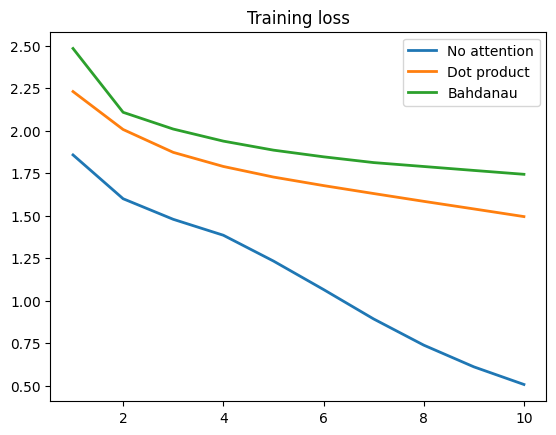

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111) 
t = np.arange(1, epochs+1)

for i in range(0, tloss.shape[0]):
  line, = plt.plot(t, tloss[i,:], lw=2)

ax.legend(('No attention', 'Dot product', 'Bahdanau'))
ax.set_title("Training loss")


Text(0.5, 1.0, 'Validation loss')

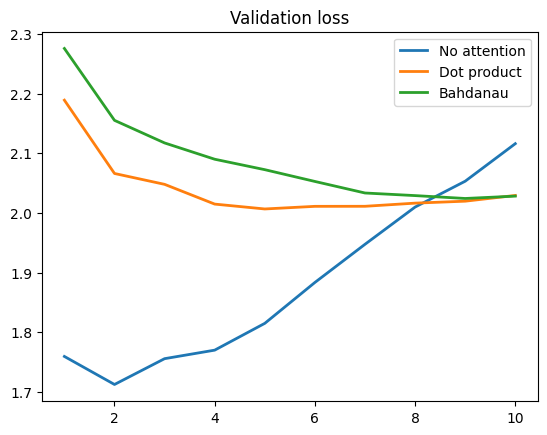

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111) 
t = np.arange(1, epochs+1)

for i in range(0, vloss.shape[0]):
  line, = plt.plot(t, vloss[i,:], lw=2)

ax.legend(('No attention', 'Dot product', 'Bahdanau'))
ax.set_title("Validation loss")
